# Assignment 1

## Data Cleaning and Preprocessing (for dataset A):
---

In [93]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import numpy as np
import copy
from scipy.stats import zscore
import matplotlib.pyplot as plt

### First Loading data B:

In [94]:
url = "D:/UW MASc/ECE 657A  Data and Knowledge Modeling and Analys/Assignment/Assignment 1/DataA.csv "
df = pd.read_csv(url)

In [95]:
df.head(10)

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,1,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,2,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,3,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,4,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,5,-171.0,NaN,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
5,6,-171.0,432.0,924.0,-179.0,1011.0,85.0,-204.0,945.0,336.0,...,655.0,-274.0,-323.0,-626.0,-969.0,-267.0,27.0,-36.0,32.0,9.0
6,7,-169.0,429.0,949.0,-175.0,1007.0,102.0,-188.0,914.0,322.0,...,655.0,-263.0,-331.0,-627.0,-975.0,-273.0,17.0,-27.0,28.0,3.0
7,8,-160.0,423.0,927.0,-195.0,996.0,123.0,-213.0,925.0,302.0,...,655.0,-251.0,-337.0,-628.0,-955.0,-275.0,8.0,-40.0,22.0,32.0
8,9,-163.0,432.0,929.0,-178.0,994.0,101.0,-186.0,946.0,296.0,...,654.0,-239.0,-343.0,-630.0,-967.0,-267.0,15.0,-34.0,-7.0,15.0
9,10,-156.0,415.0,936.0,-186.0,1014.0,111.0,-195.0,960.0,280.0,...,653.0,-228.0,-351.0,-631.0,-964.0,-264.0,7.0,-29.0,6.0,15.0


In [96]:
df=df.drop('Unnamed: 0',axis=1)
df.shape

(19000, 81)

---

### Dealing with outliers:

To find outliers the Tukey oultier labeling is applied. If a value lies below the first quartile or above the third quartile by more than 1.5 times the interquartile range, it will be considered an oultier.
Next, oultiers will be treated as a miss measurement from the specific sensor and therefore changed into missing values. 

In [97]:
x=df.describe()
IQR=x.values[6,:]-x.values[4,:] #Interquartile range of each feature
upper_limit=x.values[6,:]+1.5*IQR
lower_limit=x.values[4,:]-1.5*IQR
for i in range(78):
    outlier=( (df.iloc[:,i] < lower_limit[i]) | (df.iloc[:,i] > upper_limit[i]))
    df.iloc[:,i].loc[outlier]=np.nan


---

### Dealing with missing values:
Here we chose to drop the features and samples with more than 50% of the values missing as filling them could distort our data.


In [98]:
row_TS=df.shape [1]/2
column_TS=df.shape [0]/2
df.dropna(axis=0, thresh=row_TS, inplace=True) #droping the rows with more than 50% of the values missing 
df.dropna(axis=1, thresh=column_TS, inplace=True) #droping the columns with more than 50% of the values missing 
df.shape

(18227, 78)

As we can see above the number of samples have been reduced to 18227 instead of 19000 and the number of features is now 78 instead of 81. 

However, some missing values could still exist. Therefore, since it is a time series data, to conserve the smoothness of the time series signals the remaining missing values will be interapolated. 

In [99]:
df.interpolate(inplace=True)
df

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.72,fea.73,fea.74,fea.75,fea.76,fea.77,fea.78,fea.79,fea.80,fea.81
0,-153.0,414.0,939.0,-161.0,1007.0,99.0,-210.0,948.0,333.0,-19.0,...,655.0,-316.0,-302.0,-617.0,-955.0,-264.0,23.0,-29.0,36.0,24.0
1,-150.0,420.0,939.0,-177.0,1008.0,103.0,-207.0,939.0,316.0,9.0,...,655.0,-309.0,-304.0,-619.0,-955.0,-265.0,19.0,-31.0,47.0,3.0
2,-160.0,432.0,941.0,-162.0,982.0,98.0,-198.0,936.0,315.0,-10.0,...,655.0,-302.0,-308.0,-621.0,-966.0,-270.0,10.0,-38.0,20.0,0.0
3,-171.0,432.0,911.0,-174.0,999.0,115.0,-187.0,918.0,338.0,34.0,...,655.0,-293.0,-312.0,-622.0,-964.0,-269.0,14.0,-51.0,33.0,-1.0
4,-171.0,432.0,929.0,-189.0,1004.0,104.0,-198.0,939.0,350.0,60.0,...,655.0,-284.0,-318.0,-624.0,-966.0,-262.0,24.0,-40.0,1.0,4.0
5,-171.0,432.0,924.0,-179.0,1011.0,85.0,-204.0,945.0,336.0,94.0,...,655.0,-274.0,-323.0,-626.0,-969.0,-267.0,27.0,-36.0,32.0,9.0
6,-169.0,429.0,949.0,-175.0,1007.0,102.0,-188.0,914.0,322.0,154.0,...,655.0,-263.0,-331.0,-627.0,-975.0,-273.0,17.0,-27.0,28.0,3.0
7,-160.0,423.0,927.0,-195.0,996.0,123.0,-213.0,925.0,302.0,128.0,...,655.0,-251.0,-337.0,-628.0,-955.0,-275.0,8.0,-40.0,22.0,32.0
8,-163.0,432.0,929.0,-178.0,994.0,101.0,-186.0,946.0,296.0,166.0,...,654.0,-239.0,-343.0,-630.0,-967.0,-267.0,15.0,-34.0,-7.0,15.0
9,-156.0,415.0,936.0,-186.0,1014.0,111.0,-195.0,960.0,280.0,202.0,...,653.0,-228.0,-351.0,-631.0,-964.0,-264.0,7.0,-29.0,6.0,15.0


---

### Min-Max Normalization:

In [100]:
DFnorm1=copy.deepcopy(df)
for i in range(78):
    DFnorm1.iloc[:,i]= (df.iloc[:,i]-df.iloc[:,i].min())/(df.iloc[:,i].max()-df.iloc[:,i].min())

---

### Z-Score Normalization:

In [101]:
DFnorm2=zscore(df)
DFnorm2=pd.DataFrame(data=DFnorm2, columns=df.columns)

---

### Histograms Comparison:
#### First comparing the Min-Max normalization to the orignal

Text(0.5, 0, 'Before normalization / After normalization')

<Figure size 432x288 with 0 Axes>

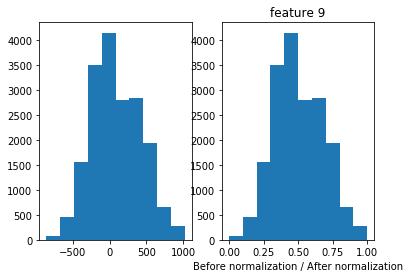

In [102]:
fig= plt.figure()
fig, (ax1, ax2) =plt.subplots(1,2)

ax1.hist(df['fea.9'])
ax2.hist(DFnorm1['fea.9'])
plt.title('feature 9')
plt.xlabel('Before normalization / After normalization')

Text(0.5, 0, 'Before normalization / After normalization')

<Figure size 432x288 with 0 Axes>

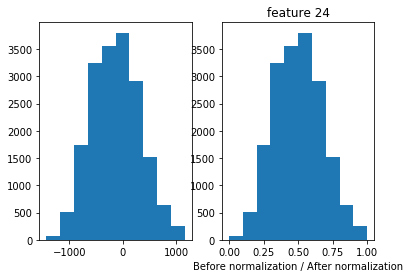

In [103]:
fig= plt.figure()
fig, (ax1, ax2) =plt.subplots(1,2)

ax1.hist(df['fea.24'])
ax2.hist(DFnorm1['fea.24'])
plt.title('feature 24')
plt.xlabel('Before normalization / After normalization')

It can be noticed from the graphs above that Min-Max normalization normalized the features between 0 and 1. Even though this could be beneficial when different features has different scales and we want them to be treated the same in our machine learning algorithm. However, this normalization has some cons: it can encounter an out-of-bounds error if a future input falls outside the data range (true population max and min should be known to avoid this); it make the samples that are far in space closer to each other and therefore difficult to seperate; and normalization is a bad choice when small differences matters.

#### Comparing the Z-Score normalization to the orignal

Text(0.5, 0, 'Before normalization / After normalization')

<Figure size 432x288 with 0 Axes>

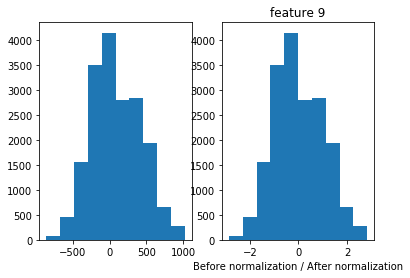

In [104]:
fig= plt.figure()
fig, (ax1, ax2) =plt.subplots(1,2)

ax1.hist(df['fea.9'])
ax2.hist(DFnorm2['fea.9'])
plt.title('feature 9')
plt.xlabel('Before normalization / After normalization')

Text(0.5, 0, 'Before normalization / After normalization')

<Figure size 432x288 with 0 Axes>

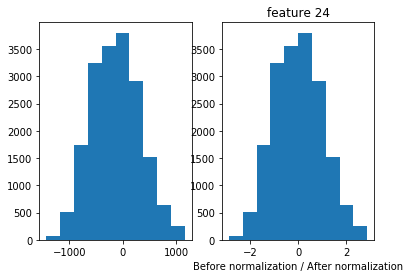

In [105]:
fig= plt.figure()
fig, (ax1, ax2) =plt.subplots(1,2)

ax1.hist(df['fea.24'])
ax2.hist(DFnorm2['fea.24'])
plt.title('feature 24')
plt.xlabel('Before normalization / After normalization')